## Table of Content
<a id="optparam"></a>

|S/N | Content  |
|:---|------------------------:
|`1.` |[Data Gathering](#gather)
`2.` |[Data Assessment](#assess)
`3.` |[Identified Issues](#issues)
|          |- [Quality Issues](#quality-issues)
|          |- [Tidiness Issues](#tidiness-issues)
`4.` |[Resolution](#resolution)
|          |- [Twitter_Archive_Ehanced Dataset](#twt)
|          |- [Dog_Image_Prediction Dataset](#dog-image)
`5.`|[Tidiness Issues](#tidy)
`6.`|[Store Data](#store)
`7.`|[Insights & Visualization](#viz)
`8.`|[References (Sources of inspiration)](#ref)

## Data Gathering
<a id="gather"></a>

In [917]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [91]:
import pandas as pd
import numpy as np
import requests
import json
from timeit import default_timer as timer
import os
import tweepy as tw

In [4]:
oet_api_key = '######'
oet_api_key_secret = '######' 

oet_access_token = '######'
oet_access_token_secret = '######'

In [14]:
auth = tw.OAuthHandler(oet_api_key, oet_api_key_secret)
auth.set_access_token(oet_access_token, oet_access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
df_1 = pd.read_csv('/Users/s.erudite/downloads/twitter-archive-enhanced.csv')
tweet_ids = df_1.tweet_id
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [25]:
# Read the json data line by line
with open('tweet_json.txt', 'r') as json_tweets:
    tweets_data = []
    for line in json_tweets:
        lines = line.replace('\n','')
        tweets_data.append(lines)
line_length = len(tweets_data)
tweet_id = []
retweet_count = []
favourite_count = []
text = {'tweet_id':[], 'retweet_count':[], 'favourite_count':[]}
for a in range(line_length):
    dictn = json.loads(tweets_data[a])
    tweet_id.append(dictn['id'])
    retweet_count.append(dictn['retweet_count'])
    favourite_count.append(dictn['favorite_count'])
text.update({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favourite_count':favourite_count})

#Create a pandas dataframe for the data
tweeter_api = pd.DataFrame(text)

In [33]:
tweeter_api.to_csv('/Users/s.erudite/downloads/twt_api_data.csv', encoding = 'utf-8', index = False)

In [103]:
#Create image prediction folder
folder_name = 'dog_image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#Request for the data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
dog_prediction = requests.get(url, allow_redirects=True)

#Access and write to a file

with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as f:
    f.write(dog_prediction.content)

#Confirm that the file is in the folder
os.listdir(folder_name)

#load  the image-prediction into a pandas dataframe
dog_prediction = pd.read_csv('dog_image_prediction/image-predictions.tsv', sep='\t')

In [10]:
twitter_archive_enhanced = pd.read_csv('/Users/s.erudite/downloads/twitter-archive-enhanced.csv')

## Data Assessment
<a id="assess"></a>

In [835]:
tweeter_api.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6982,33745
1,892177421306343426,5284,29274
2,891815181378084864,3469,22003
3,891689557279858688,7205,36855
4,891327558926688256,7730,35235


In [136]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [167]:
twitter_archive_enhanced.name =='None'

0       False
1       False
2       False
3       False
4       False
        ...  
2351     True
2352    False
2353    False
2354    False
2355     True
Name: name, Length: 2356, dtype: bool

In [28]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
tweeter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2311 non-null   int64
 1   retweet_count    2311 non-null   int64
 2   favourite_count  2311 non-null   int64
dtypes: int64(3)
memory usage: 54.3 KB


In [140]:
dog_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [139]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [219]:
# Are there unreasonable numerator ratings? (e.g. more than 2 digits rating)
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'].sort_values() > 99]

/var/folders/yp/z1lmlfmn423437dbwqvvn1nw0000gn/T/ipykernel_27051/2398045135.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'].sort_values() > 99]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [220]:
#Are there denominator ratings above 10
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'].sort_values() > 10]

/var/folders/yp/z1lmlfmn423437dbwqvvn1nw0000gn/T/ipykernel_27051/480466649.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'].sort_values() > 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [37]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [109]:
dog_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
tweeter_api.isnull().sum()

tweet_id           0
retweet_count      0
favourite_count    0
dtype: int64

In [155]:
all_columns = pd.Series(list(twitter_archive_enhanced)+list(tweeter_api)+list(dog_prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [147]:
tweeter_api.duplicated().sum()

0

In [57]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [58]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [89]:
twitter_archive_enhanced.apply(lambda row: row.astype(str).str.contains('gofundme').any(), axis=1).value_counts()

False    2323
True       33
dtype: int64

In [223]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [358]:
clean_twitter_archive_enhanced = twitter_archive_enhanced.copy()
clean_tweeter_api = tweeter_api.copy()
clean_dog_image = dog_prediction.copy()

In [170]:
clean_twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [118]:
#Programmatic assessment
clean_tweeter_api

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6982,33745
1,892177421306343426,5284,29274
2,891815181378084864,3469,22003
3,891689557279858688,7205,36855
4,891327558926688256,7730,35235
...,...,...,...
2306,666049248165822465,36,88
2307,666044226329800704,115,247
2308,666033412701032449,36,100
2309,666029285002620928,39,112


In [359]:
clean_dog_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [126]:
#Do we have some duplicates?
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [195]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [204]:
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['expanded_urls'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    59 non-null     int64  
 1   in_reply_to_status_id       55 non-null     float64
 2   in_reply_to_user_id         55 non-null     float64
 3   timestamp                   59 non-null     object 
 4   source                      59 non-null     object 
 5   text                        59 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               0 non-null      object 
 10  rating_numerator            59 non-null     int64  
 11  rating_denominator          59 non-null     int64  
 12  name                        59 non-null     object 
 13  doggo                       59 non

In [127]:
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.expanded_urls=='https://www.gofundme.com/help-strudel-walk-again?rcid=ec2be8b6f825461f8ee0fd5dcdf43fea,https://twitter.com/dog_rates/status/817415592588222464/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None


In [194]:
dog_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Identified Issues
<a id="issues"></a>
   
### Quality Issues
<a id="quality-issues"></a>
`clean_twitter_archive_enhanced` table

1. Timestamp column should be splitted into time and date columns and then dropped. 

2. Timestamp data type is object instead of datetime

3. Some enominator rating is less than 10 (e.g. 0,2) instead of 10

4. Some entries are not dog ratings, e.g 343rd entery

5. 59 expanded_urls are missing

6. There are rows with unreasonable numerator rating (e.g. more than 2 digits rating_numerator)

7. There are rows with unreasonable denominator rating (e.g. above 99)

8. Remove rows that are retweets

`clean_dog_image` dataset

9. Inconsistency in the capitalisation of p1, p2, p3 columns values

10. Some rows are obviously not about dog.


### Tidiness issues
<a id="tidiness-issues"></a>
1. Retweet column not needed in the `clean_twitter_archive_enhanced` table

2. The 4 dog stages should be in one column instead of standing alone in their individual columns

3. The 3 dataframes should be joined into one `master_dataset`

## Resolution
<a id="resolution"></a>
#### `clean_twitter_archive_enhanced` dataset quality issues
<a id="twt"></a>

#### Define
Timestamp column should be splitted into time and date columns and then dropped from the dataset

#### Code

In [237]:
clean_twitter_archive_enhanced.timestamp.head(1)

0   2017-08-01 16:23:56+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [248]:
# Extract date into its column
clean_twitter_archive_enhanced['date'] = clean_twitter_archive_enhanced['timestamp'].str[:10]

# Extract Time into its column
clean_twitter_archive_enhanced['time'] = clean_twitter_archive_enhanced['timestamp'].str[11:19]

# Drop  the timestamp column
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop('timestamp', axis=1)

In [249]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

#### Define
Change the new date and time columns data type from object to datetime using to_datetime method

#### Code

In [253]:
# Converting time and date columns to datetime
clean_twitter_archive_enhanced['time'] = pd.to_datetime(clean_twitter_archive_enhanced['time'])
clean_twitter_archive_enhanced['date'] = pd.to_datetime(clean_twitter_archive_enhanced['date'])

#### Test

In [254]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

#### Define
Change the denominator rating of 0, 2 to 10 using `.replace` method

#### Code

In [260]:
# Replace 0 with 10 in the rating_denominator
clean_twitter_archive_enhanced['rating_denominator'] = clean_twitter_archive_enhanced['rating_denominator'].replace(0, 10)
# Replace 2 with 10 in the rating_denominator
clean_twitter_archive_enhanced['rating_denominator'] = clean_twitter_archive_enhanced['rating_denominator'].replace(2, 10)

#### Test

In [688]:
#Test for denominator rating of 0 and 2
clean_twitter_archive_enhanced['rating_denominator'] == 0
print()
clean_twitter_archive_enhanced['rating_denominator'] == 2

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: rating_denominator, Length: 2356, dtype: bool

#### Define
Use tweet_id to get the expanded_url for the 59 missing values

#### Code

In [268]:
# Add tweet_id if expanded_urls is null
def get_urls(cell):
    # Bypass if expanded_urls is not empty
    if pd.notnull(cell['expanded_urls']):
        return cell
    else:
        # Fetch tweet_id
        tweet_id = cell['tweet_id']
        #Add into expanded_urls
        cell['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated cell
        return cell


# Replace missing urls in the dataset
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.apply(get_urls, axis=1)

#### Test

In [271]:
sum(clean_twitter_archive_enhanced.expanded_urls.isnull())

0

#### Define
Drop 343rd entery since it isn't a dog rating

#### Code

In [291]:
#Drop 343rd entry
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(clean_twitter_archive_enhanced.index[342])

#### Test

In [297]:
clean_twitter_archive_enhanced.iloc[340:343]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
340,832215909146226688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,2017-02-16,2022-08-11 13:11:49
341,832215726631055365,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None,2017-02-16,2022-08-11 13:11:05
344,832032802820481025,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None,2017-02-16,2022-08-11 01:04:13


In [278]:
clean_twitter_archive_enhanced.iloc[340:347]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
340,832215909146226688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,2017-02-16,2022-08-11 13:11:49
341,832215726631055365,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None,2017-02-16,2022-08-11 13:11:05
342,832088576586297345,8.320875e+17,30582082.0,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832088576...,11,15,None,None,None,None,None,2017-02-16,2022-08-11 04:45:50
343,832040443403784192,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None,2017-02-16,2022-08-11 01:34:34
344,832032802820481025,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None,2017-02-16,2022-08-11 01:04:13
345,831939777352105988,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,None,None,None,2017-02-15,2022-08-11 18:54:34
346,831926988323639298,8.319030e+17,20683724.0,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831926988...,12,10,None,None,None,None,None,2017-02-15,2022-08-11 18:03:45


In [299]:
# Replace 0 with 10 in the rating_denominator
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['rating_denominator']>99]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
902,758467244762497024,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,2016-07-28,2022-08-11 01:00:57
1120,731156023742988288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,2016-05-13,2022-08-11 16:15:54
1634,684225744407494656,6.842229e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None,2016-01-05,2022-08-11 04:11:44
1635,684222868335505415,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None,2016-01-05,2022-08-11 04:00:18
1779,677716515794329600,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None,2015-12-18,2022-08-11 05:06:23


#### Define
Replace any denominator rating that is above the standard 10 with 10 (the standard rating)

#### Code

In [319]:
# Replace rating_denominator > 10 with 10
clean_twitter_archive_enhanced['rating_denominator'].where(clean_twitter_archive_enhanced['rating_denominator'] <= 10, 10, inplace=True)

#### Test

In [320]:
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['rating_denominator'] >10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


#### Define
Replace unreasonable numerator rating (e.g. more than 2 digits rating_numerator) with 10.

#### Code


In [321]:
#Replace numerator rating that is above 99 with 10
clean_twitter_archive_enhanced['rating_denominator'].where(clean_twitter_archive_enhanced['rating_denominator'] <= 99, 10, inplace=True)

#### Test

In [313]:
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['rating_numerator'] >99]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


###  `dog_image` dataset quality issues
<a id="dog-image"></a>

#### Define 
Capitalize the first letter of the dog name in p1, p2, p3 columns using `str.title()`

#### Code

In [325]:
clean_dog_image['p1'] = clean_dog_image['p1'].str.title()
clean_dog_image['p2'] = clean_dog_image['p2'].str.title()
clean_dog_image['p3'] = clean_dog_image['p3'].str.title()

#### Test

In [360]:
clean_dog_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
Remove rows that obviously ain't about dogs. Since they are many and removing all will take much time and probably reduce the dataset drastically, I will drop 10 of them.

#### Code

In [394]:
clean_dog_image.drop([205 , 214, 215, 217, 302, 366, 891, 1048, 1059, 1356], axis=0, inplace=True)

#### Test
Note that if you try rerunning this code snippet 

#### *`clean_dog_image.drop([205 , 214, 215, 217, 302, 366, 891, 1048, 1059, 1356], axis=0, inplace=True)`* 
You will get this error message:
`KeyError: '[ 205 214 215 217 302 366 891 1048 1059 1356] not found in axis'`

In [396]:
#Observe that you won't see index numbers 205, 214, 215, 217 within the supplied array
clean_dog_image.iloc[204:218]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True
206,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,1,vizsla,0.743216,True,redbone,0.217282,True,Rhodesian_ridgeback,0.028473,True
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
216,670061506722140161,https://pbs.twimg.com/media/CUyJYk1WoAMPROb.jpg,1,Italian_greyhound,0.329339,True,American_Staffordshire_terrier,0.305294,True,whippet,0.111686,True


In [399]:
#Also notice that the total number of rows has reduced by 10
clean_dog_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2065 non-null   int64  
 1   jpg_url   2065 non-null   object 
 2   img_num   2065 non-null   int64  
 3   p1        2065 non-null   object 
 4   p1_conf   2065 non-null   float64
 5   p1_dog    2065 non-null   bool   
 6   p2        2065 non-null   object 
 7   p2_conf   2065 non-null   float64
 8   p2_dog    2065 non-null   bool   
 9   p3        2065 non-null   object 
 10  p3_conf   2065 non-null   float64
 11  p3_dog    2065 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 167.4+ KB


## Tidiness Issues
<a id="tidy"></a>

#### Define
<a id="rt"></a>
Find and drop retweets from the dataset

#### Code

In [840]:
# Find all the retweets in the dataset
retweets = clean_twitter_archive_enhanced.text.str.match('^RT @')

In [846]:
#There are 181 retweets roles in the dataset that needs to be removed.
retweets.value_counts()

False    2175
True      181
Name: text, dtype: int64

In [847]:
# Remove the retweets
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[~retweets]

#### Test

In [931]:
clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.text.str.match('^RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_stage


#### Define
<a id="dc"></a>
Remove the columns occupying index numbers 6,7,8 in the `clean_twitter_archive_enhanced` table since they are not needed for this analysis using `.drop`

#### Code

In [849]:
#Drop columns with the specified index number
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(clean_twitter_archive_enhanced.columns[[6,7,8]], axis=1)

#### Test

In [850]:
#Check if the 3 columns have been dropped
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   name                   2175 non-null   object 
 7   dog_stage              2175 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 152.9+ KB


#### Define
<a id="dog stages"></a>
Group the 4 stages of dogs in one column and drop the extraneous columns

#### Code

In [ ]:
clean_twitter_archive_enhanced['doggo'] = clean_twitter_archive_enhanced['doggo'].str.replace('None','',regex=False)
clean_twitter_archive_enhanced['floofer'] = clean_twitter_archive_enhanced['floofer'].str.replace('None','',regex=False)
clean_twitter_archive_enhanced['pupper'] = clean_twitter_archive_enhanced['pupper'].str.replace('None','',regex=False)
clean_twitter_archive_enhanced['puppo'] = clean_twitter_archive_enhanced['puppo'].str.replace('None','',regex=False)

# Create a new column called dog_stage
clean_twitter_archive_enhanced['dog_stage'] = (clean_twitter_archive_enhanced['pupper']+' '+clean_twitter_archive_enhanced['doggo']+' '+clean_twitter_archive_enhanced['puppo']+' '+clean_twitter_archive_enhanced['floofer']).str.strip()
clean_twitter_archive_enhanced['dog_stage'] = clean_twitter_archive_enhanced['dog_stage'].str.replace('  ',' ',regex=False) 

#### Test
Confirm that all the dog_stage values are represented in the new dog_stage column

In [477]:
clean_twitter_archive_enhanced.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
pupper doggo       12
floofer             9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

#### Define
<a id="ec"></a>
Drop these columns that are now extraneous (doggo, floofer, pupper and puppo) using their column index

#### Code

In [667]:
clean_twitter_archive_enhanced.drop(clean_twitter_archive_enhanced.columns[[10,11,12,13]], axis=1, inplace=True)

#### Test

In [852]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   name                   2175 non-null   object 
 7   dog_stage              2175 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 152.9+ KB


#### Define
Merge the 3 datasets using `pd.merge()` method

#### Code

In [853]:
twitter_archive_master = pd.merge(clean_twitter_archive_enhanced, clean_tweeter_api, on=['tweet_id'], how ='left')
twitter_archive_master = pd.merge(twitter_archive_master, clean_dog_image, on=['tweet_id'], how='left')

#### Test

In [854]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   name                   2175 non-null   object 
 7   dog_stage              2175 non-null   object 
 8   retweet_count          2151 non-null   float64
 9   favourite_count        2151 non-null   float64
 10  jpg_url                1984 non-null   object 
 11  img_num                1984 non-null   float64
 12  p1                     1984 non-null   object 
 13  p1_conf                1984 non-null   float64
 14  p1_dog                 1984 non-null   object 
 15  p2  

## Store Data
<a id="store"></a>

#### Define
Save the final product as `twitter_archive_master.csv`

#### Code

In [855]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Insights & Visualization
<a id="viz"></a>

## `1` Is there a correlation between the retweet_count and favourite_count columns

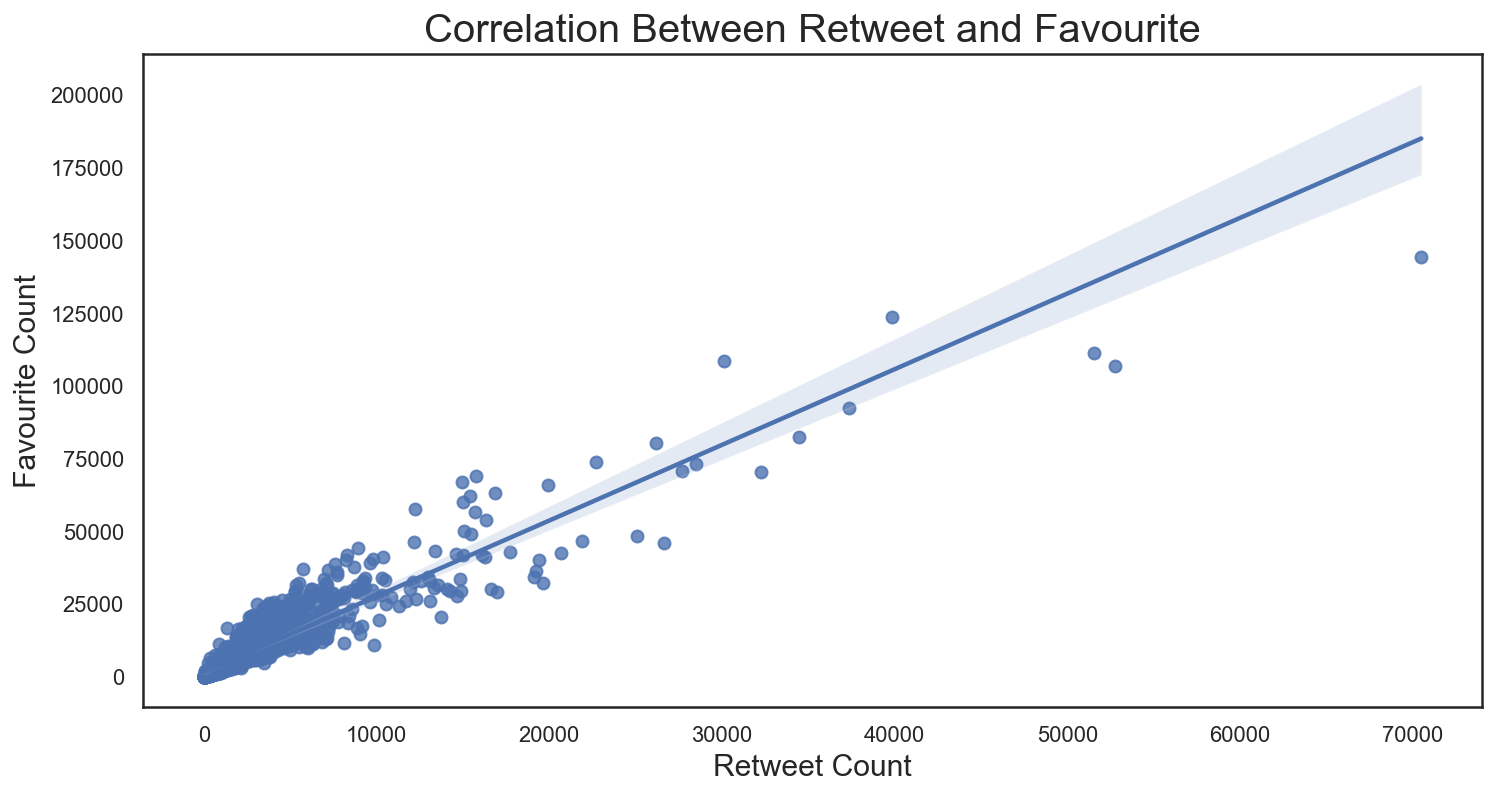

In [933]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_style('white')
plt.figure(figsize = (12,6))
ax = sns.regplot(x="retweet_count", y="favourite_count", data=twitter_archive_master)
plt.xlabel("Retweet Count",fontsize = 15);
plt.ylabel("Favourite Count",fontsize = 15);
plt.title("Correlation Between Retweet and Favourite",fontsize = 20);

* _The Visualization above shows a positive correlation between retweet_count and favourite count_

## `2` Can we find out which dog stage is most retweeted?

In [869]:
twitter_archive_master.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
pupper doggo       10
floofer             9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

In [870]:
# Get rid of the stages with just 1 value count and the unidentified stage
tam = twitter_archive_master.query('dog_stage !="doggo puppo" & dog_stage != "" & dog_stage != "doggo floofer"')
tam['dog_stage'].value_counts()

pupper          224
doggo            75
puppo            24
pupper doggo     10
floofer           9
Name: dog_stage, dtype: int64

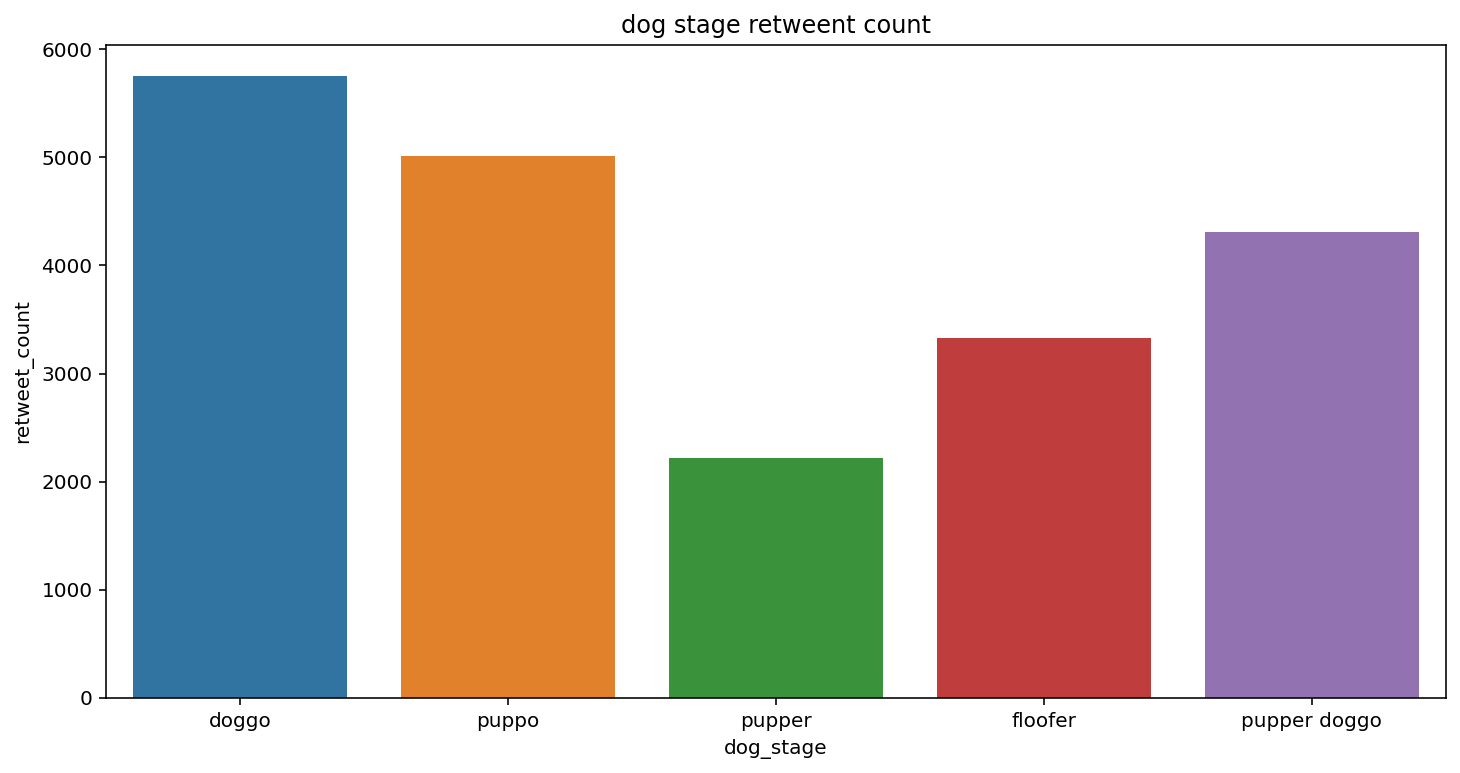

In [775]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'dog_stage',
            y = 'retweet_count',
            data = tam,
            ci = 0)
plt.title('dog stage retweent count')
# Show the plot
plt.show()

## `3` Let us visually find out which is the most favourite dog stage among the audience of '@WeRateDogs'

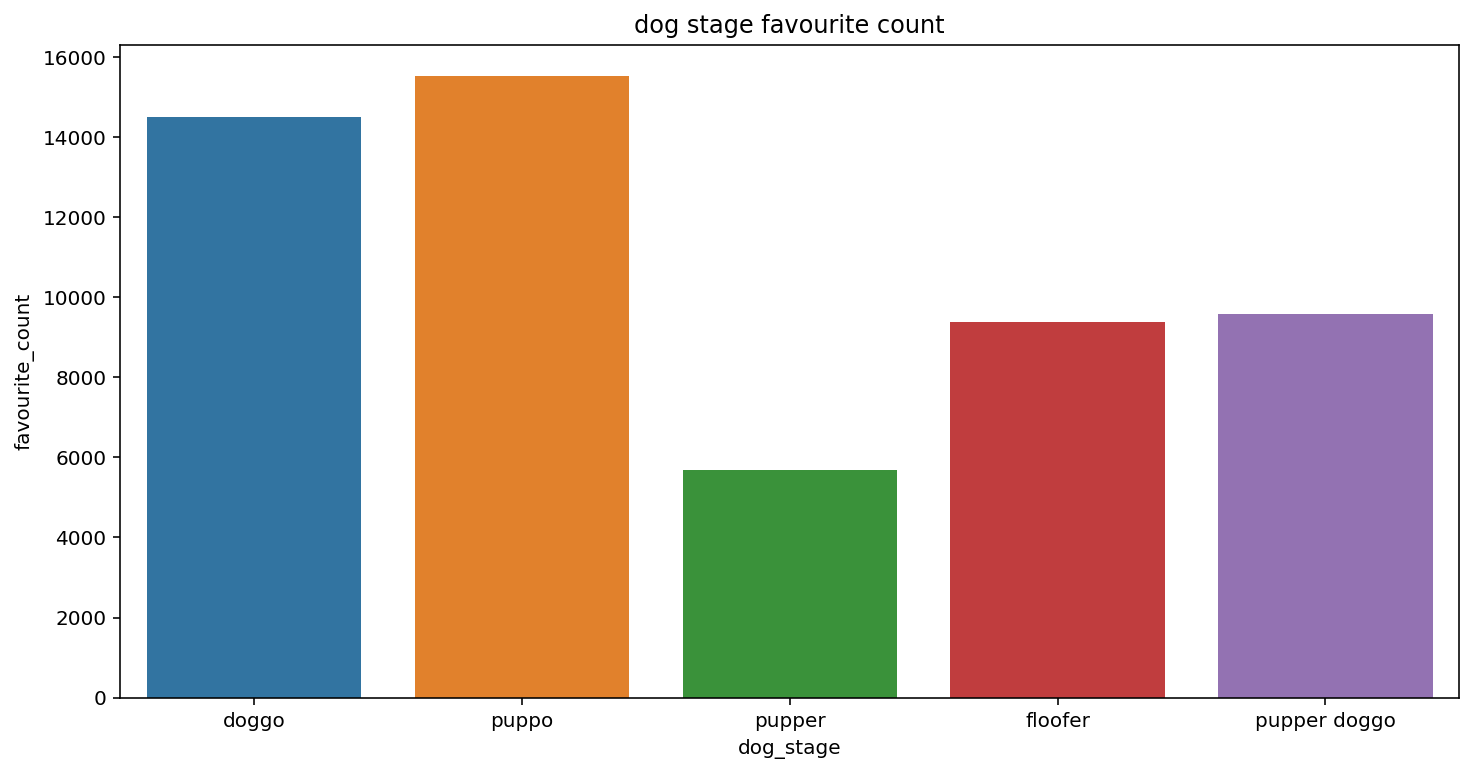

In [776]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'dog_stage',
            y = 'favourite_count',
            data = tam,
            ci = 0)
plt.title('dog stage favourite count')
# Show the plot
plt.show()

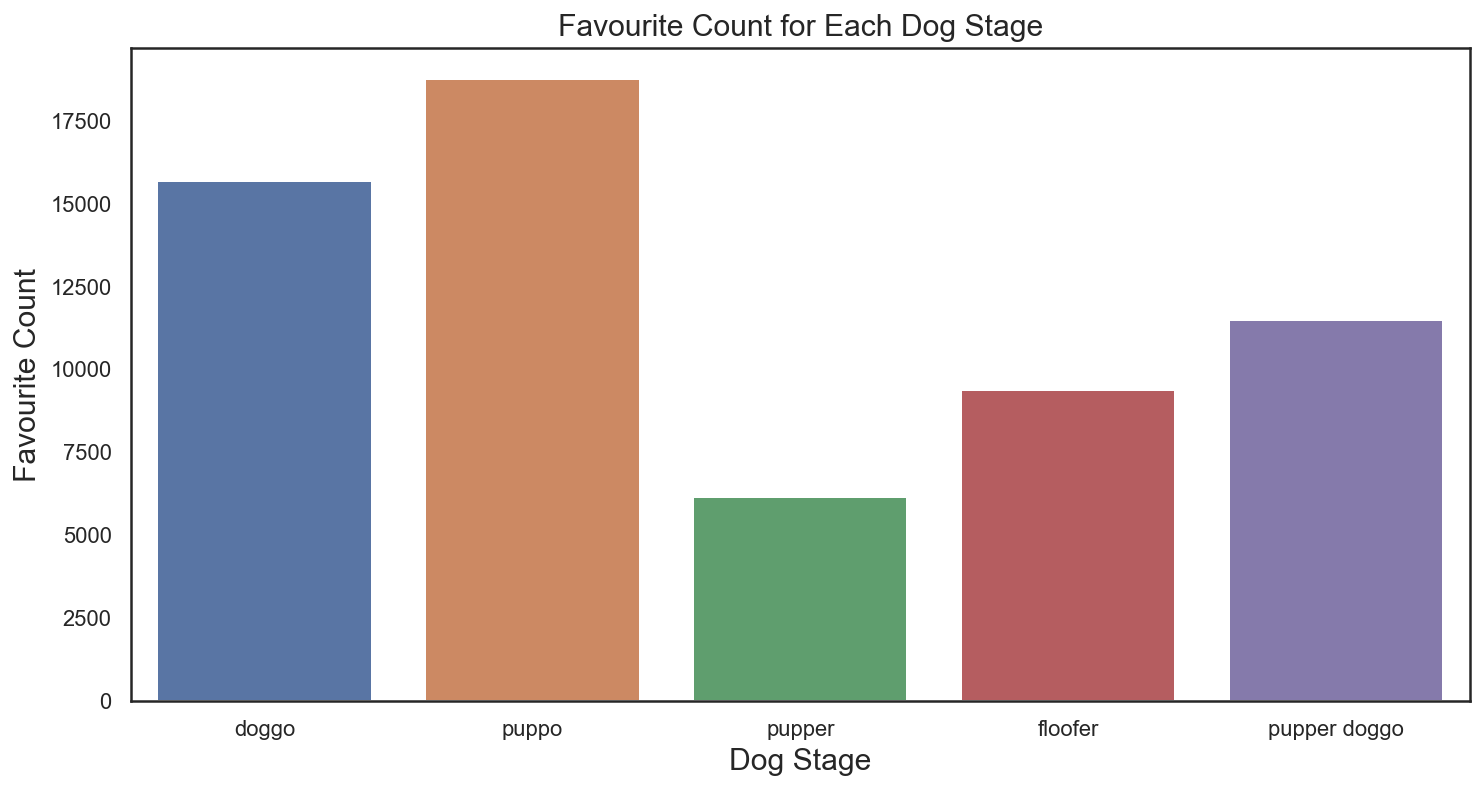

In [912]:
sns.set_style('white')
plt.figure(figsize = (12,6))
sns.barplot(x = 'dog_stage',
            y = 'favourite_count',
            data = tam,
            ci = 0)
plt.xlabel("Dog Stage",fontsize = 15)
plt.ylabel("Favourite Count",fontsize = 15);
plt.title("Favourite Count for Each Dog Stage",fontsize = 15);
# Show the plot
plt.show()

## `4` Can we be a little more curious shall we?🤔
`i.` Which tweet had the highest favourite_count and the dog_stage tweeted?

`ii.` Which tweet had the highest retweet_count and the dog_stage tweeted?

In [879]:
# Pandas, display all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [888]:
# Most favourite tweet
tam.sort_values('favourite_count', ascending=False).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_stage,retweet_count,favourite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
862,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,None,doggo,70495.0,144528.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [894]:
#Most retweeted tweet
tam.sort_values('retweet_count', ascending=False).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_stage,retweet_count,favourite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
862,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,None,doggo,70495.0,144528.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


### In the above two cells, the same tweet about a doggo had the most favourite and the most retweets in the dataset

### `5` Top 10 most popular dog breeds in the first (p1), second (p2) and third (p3) predictions?

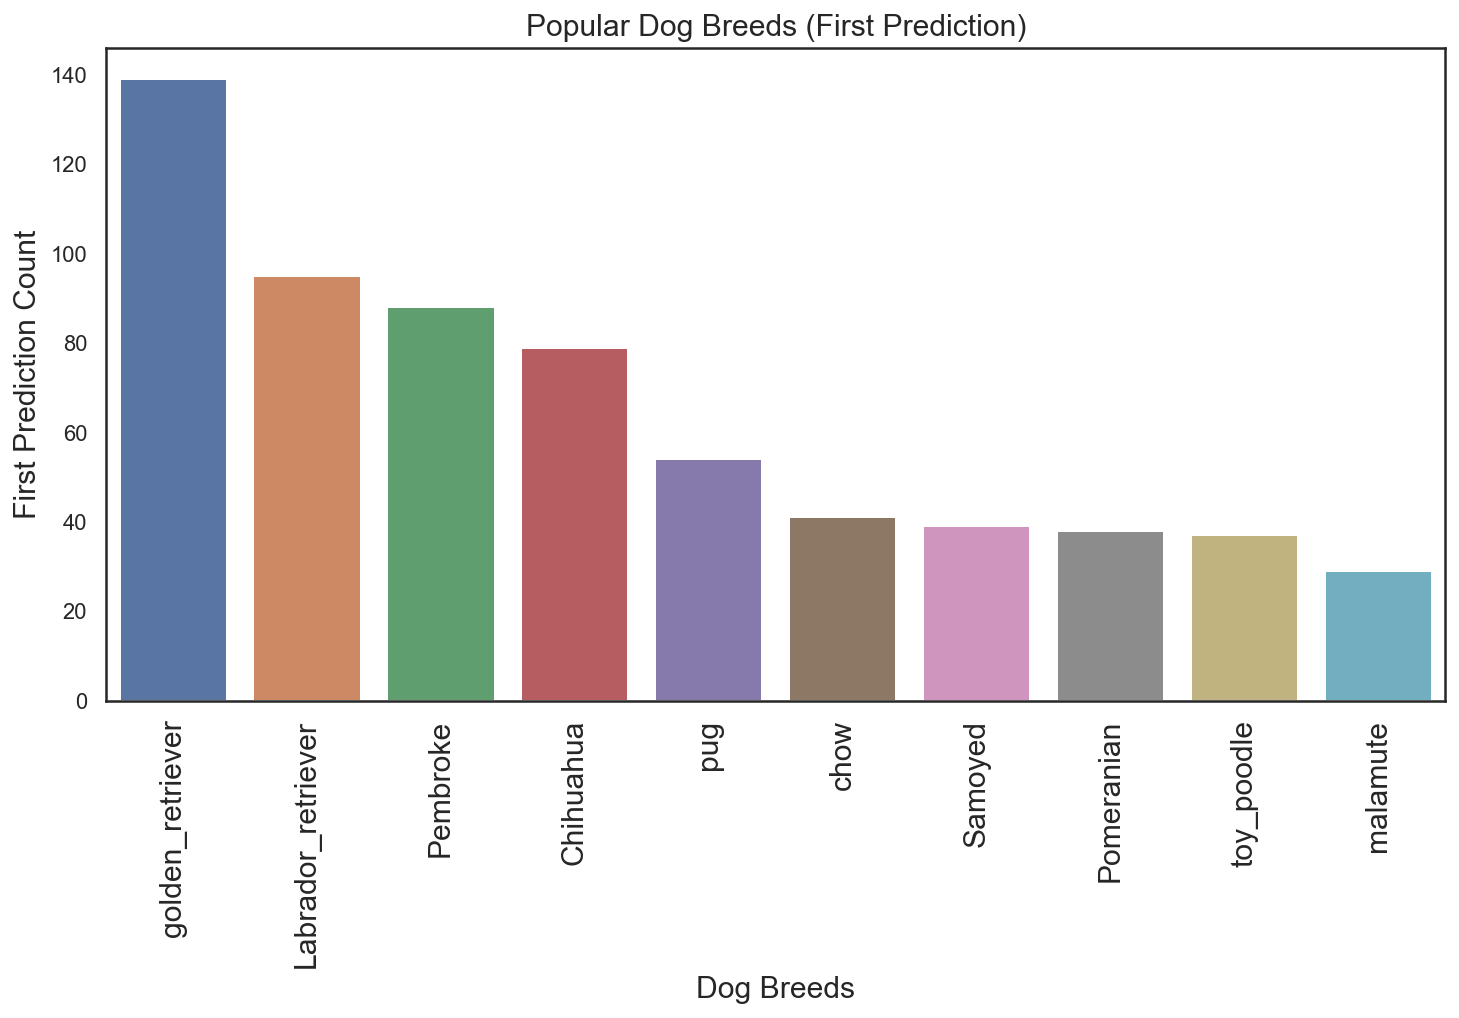

In [936]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = twitter_archive_master['p1'].value_counts()[0:10].index,
            y =twitter_archive_master['p1'].value_counts()[0:10],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("First Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds (First Prediction)",fontsize = 15);

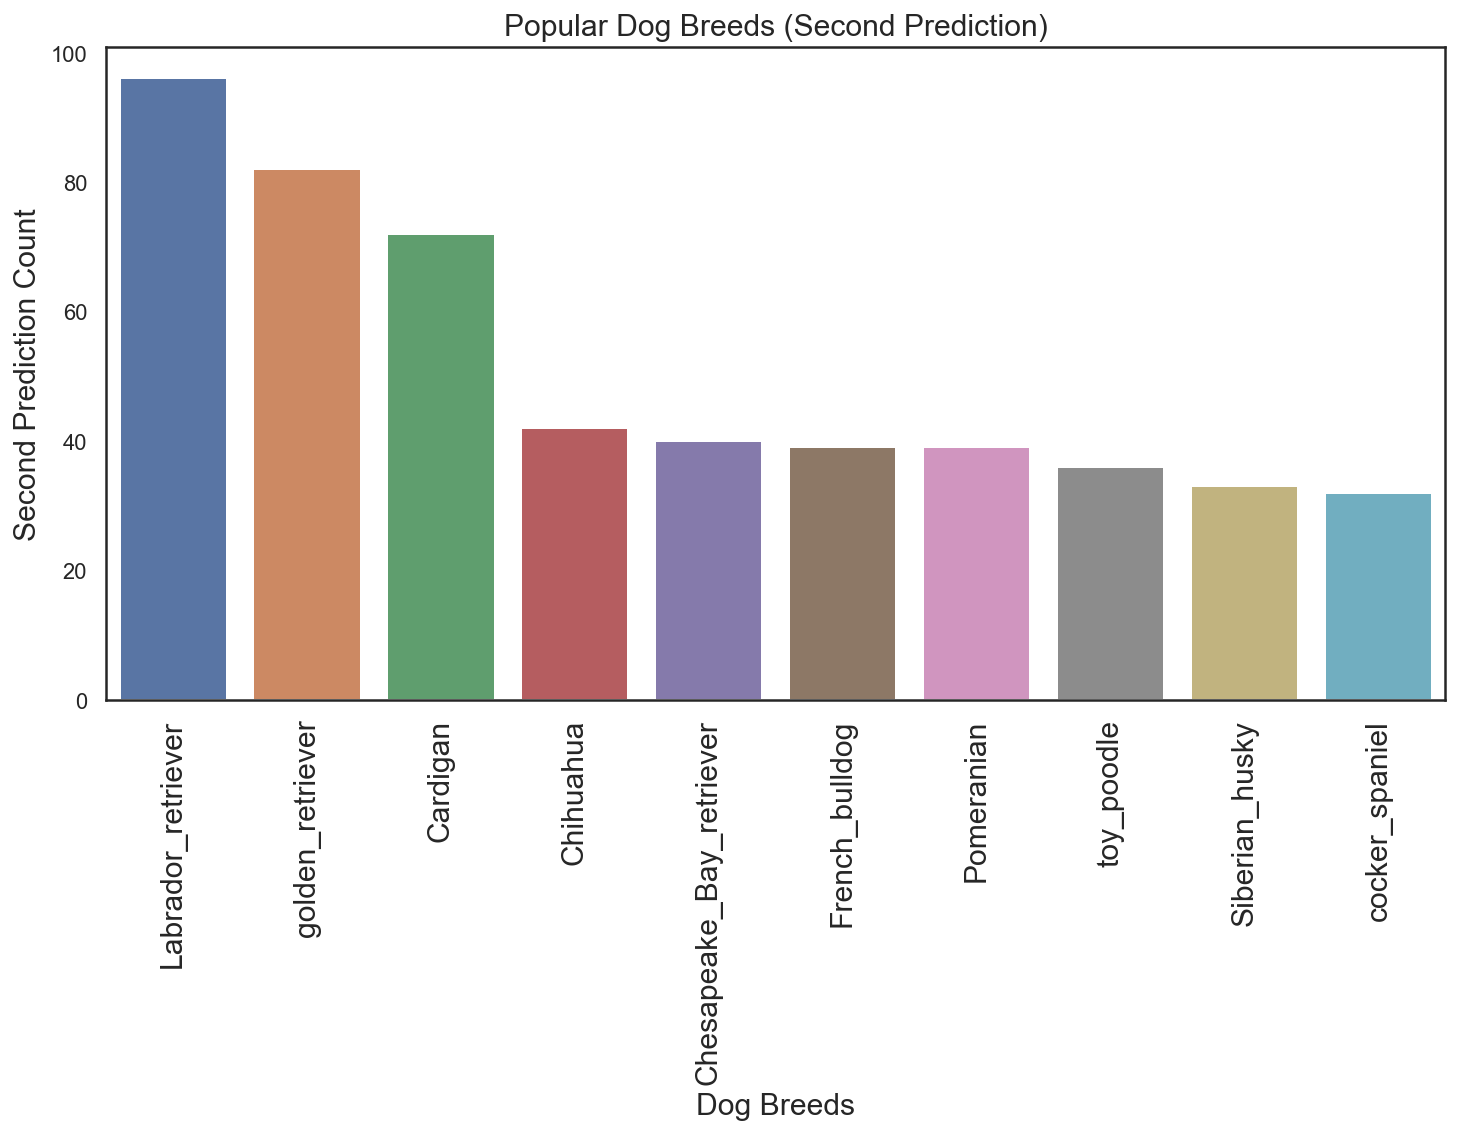

In [915]:
sns.set_style('white')
plt.figure(figsize = (12,6))
ax = sns.barplot(x = twitter_archive_master['p2'].value_counts()[0:10].index,
            y =twitter_archive_master['p2'].value_counts()[0:10],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("Second Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds (Second Prediction)",fontsize = 15);

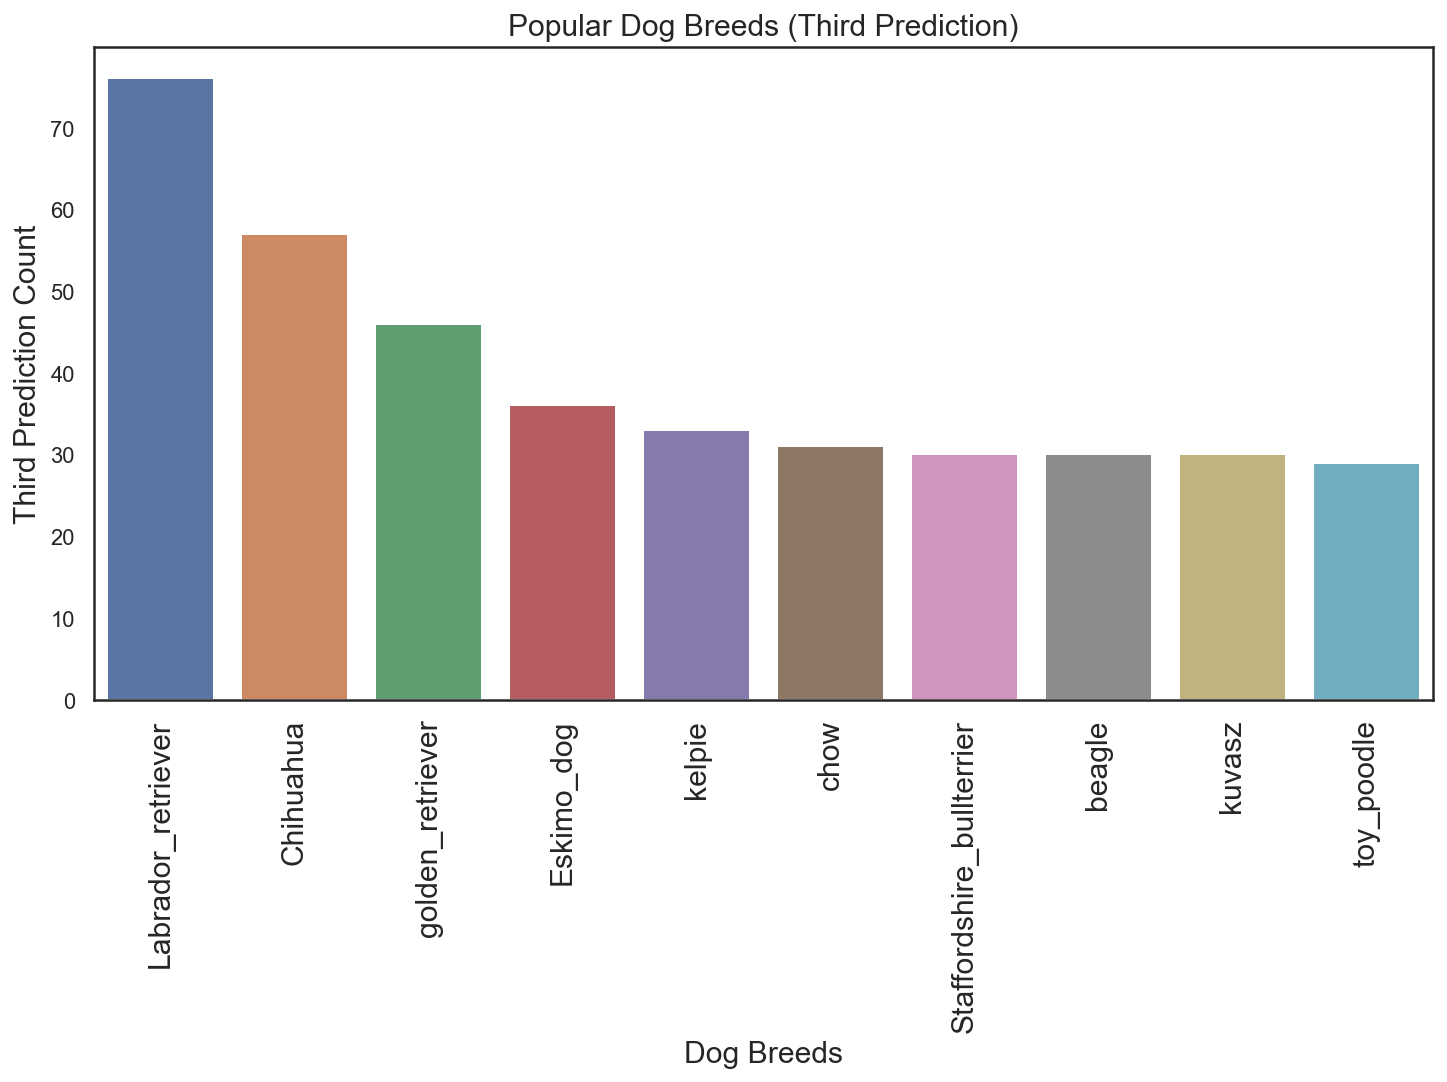

In [937]:
sns.set_style('white')
plt.figure(figsize = (12,6))
ax = sns.barplot(x = twitter_archive_master['p3'].value_counts()[0:10].index,
            y =twitter_archive_master['p3'].value_counts()[0:10],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("Third Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds (Third Prediction)",fontsize = 15);

### In the first prediction (p1), golden retriever was the most favourite but  Labrador_retriever led in the second (p2) and third (p3) predictions

### `6` Which dog stage had the highest sum of retweets and favourites in the entire master dataset?

In [899]:
#The maximum sum of favourite_count of dog_stage
tam.groupby('dog_stage')['favourite_count'].sum().max()
#The next task now is to find out which dog stage will return true to this maximum sum

1379483.0

In [900]:
# Programmatically assess which dog stage is the most favourite
tam.groupby('dog_stage')['favourite_count'].sum() == tam.groupby('dog_stage')['favourite_count'].sum().max()
# Pupper tops the highest sum total of favourite_count in the dog_state column

dog_stage
doggo           False
floofer         False
pupper           True
pupper doggo    False
puppo           False
Name: favourite_count, dtype: bool

In [901]:
#The maximum sum of retweet_count of dog_stage
tam.groupby('dog_stage')['retweet_count'].sum().max()
#The next task now is to find out which dog stage will return true to this maximum sum

443048.0

In [902]:
#Programmatically determine which dog_stage is the most retweeted
tam.groupby('dog_stage')['retweet_count'].sum() == tam.groupby('dog_stage')['retweet_count'].sum().max()

dog_stage
doggo           False
floofer         False
pupper           True
pupper doggo    False
puppo           False
Name: retweet_count, dtype: bool

#### Conclusion
Dogs in the pupper stage had the highest sum of retweets and favourites in the `twitter_archive_master` dataset

## References (Sources of inspiration)
<a id="ref"></a>
`1` [Seaborn](https://seaborn.pydata.org/index.html)

`2` [How to show all columns / rows of a Pandas Dataframe](https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)

`3` [Mr Geislinger](https://github.com/MrGeislinger/UdacityDAND_Proj_WrangleAndAnalyzeData/blob/master/wrangle_act.ipynb)

`4` [Amyfehilly](https://github.com/amyfehilly/twitter_api/blob/master/wrangle_act.ipynb)

`5` [Jemc36](https://github.com/jemc36/Udacity-DAND-DataWrangling-TwitterAPI-WeRateDogs/blob/master/wrangle_act.ipynb)

`6` [Abdelrazekrizk](https://github.com/abdelrazekrizk/FWD-Udacity-Wrangle-and-Analyze-Data-Twitter-API/blob/main/wrangle_act.ipynb)

`7` [How to search a value within a Pandas DataFrame](https://www.projectpro.io/recipes/search-value-within-pandas-dataframe-column)

`8` [Pandas](https://pandas.pydata.org/)

`9` [Matplotlib](https://matplotlib.org/stable/index.html)
